# Spotify Playlist Popularity Prediction

## Motivation

The purpose of this project is to build a model to predict the popularity of a Spotify playlist given different features of the playlist. Data was scraped, cleaned, and combined data from various web sources to generate a model that generates a predicted value for this number.

## Spotify Features

* followers:	number of followers on Spotify
* name:	name of playlist
* owner:	owner of playlist (all are Spotify)
* track_ids:	list of Spotify ID’s of all tracks in playlist
* num_tracks:	number of tracks in playlist
* avg_song_popularity:	average popularity of component tracks (value between 0 and 100, with 100 being the most popular)
* avg_loudness:	average loudness of component tracks (decibels)
* avg_speechiness:	average speechiness of component tracks (value between 0.0 and 1.0, with 1.0 being the most speech-like); m* easures the presence of spoken words in a track (values above 0.66 represent tracks that are entirely speech, between 0.33 and 0.66 represents a mix of music and speech, below 0.33 represents entirely music)
* avg_acousticness:	average confidence level for whether or not component tracks are acoustic (value between 0.0 and 1.0, with 1.0 being the highest confidence that track is acoustic)
* avg_instrumentalness:	average value of how instrumental, as opposed to vocal, component tracks are(value between 0.0 and 1.0, with 1.0 being entirely instrumental)
* avg_liveness:	average value for probability that component tracks were performed live (value between 0.0 and 1.0, with 1.0 representing high likelihood that a track was performed live)
* avg_valence:	average musical positiveness of component tracks (value between 0.0 and 1.0, with 1.0 being the most positive); high valence tracks sound more positive (e.g. happy, cheerful, euphoric) and low valence sound more negative * (e.g. sad, depressed, angry)
* avg_num_artists:	average number of artists that performed in component tracks
* avg_num_markets:	average number of countries in which component tracks can be played
* majority_explicit:	binary value indicating whether the majority of component tracks contain explicit lyrics (1 = explicit, 0 = not explicit)
* majoirty_mode:	binary value indicating the modality of the majority of component tracks (1 = major, 0 = minor)
* majority_album_type:	type of album from which the majority of component tracks come from (album, compilation, single, NaN)
* avg_album_popularity:	average popularity of albums on which component tracks were released (value between 0.0 and 100.0, with 100.0 being the most popular)
* avg_album_release_year:	average release year of albums on which component tracks were released
* avg_artist_popularity	:average popularity of artists of component track (value between 0.0 and 100.0, with 100.0 being the most popular)
* avg_artist_followers:	average number of followers of artists of component tracks
* majoirty_artist_genres:	genre of majority of artists of component tracks

## Additional Features

### attribute	description
* avg_danceability:	average danceability of component tracks (value between 0.0 and 1.0, with 1.0 being the most danceable); measure of tracks’ suitability for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity
* avg_duration_ms:	average duration of component tracks (milliseconds)
* avg_energy:	average energy of component tracks (value between 0.0 and 1.0, with 1.0 being the most energetic); represents perceptual measure of intensity and activity
* majority_key:	key of the majority of component tracks using standard Pitch Class notation (0 = C, 1 = C#/Db, 2 = D, etc.)
* majority_time_signature:	time signature of majority of component tracks

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import operator
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/sudoh/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
spotify_df = pd.read_csv('final_dataset.csv')
spotify_df = spotify_df.dropna()
spotify_df = spotify_df.drop(['Unnamed: 0'], axis = 1)
spotify_df.head()

,followers,majority_artist_genres,name,owner,track_ids,num_tracks,avg_song_popularity,avg_danceability,avg_energy,avg_loudness,...,avg_num_markets,majority_explicit,majority_mode,majority_key,majority_time_signature,majority_album_type,avg_album_popularity,avg_album_release_year,avg_artist_popularity,avg_artist_followers
0,18129916,pop,Today's Top Hits,spotify,"['0tBbt8CrmxbjRP0pueQkyU', ' 2amzBJRBPOGszBem4...",50,84.277778,0.624333,0.660000,-5.696467,...,38.500000,0.0,0.0,11.0,4.0,single,81.444444,2017.000000,91.160000,2545532.960
1,8323892,rap,RapCaviar,spotify,"['4dVpf9jZjcORqGTLUaeYj9', ' 3ncgNpxLoBQ65ABk4...",51,76.900000,0.667125,0.697000,-6.476875,...,38.200000,1.0,1.0,5.0,4.0,album,77.800000,2017.000000,87.538462,1250737.000
2,4600937,tropical house,mint,spotify,"['3VQDpxMffTaggOHEeur7Tj', ' 43V1z6QToNNWNldV4...",52,52.800000,0.718800,0.693400,-6.560600,...,38.000000,0.0,0.0,6.0,4.0,single,49.000000,2016.800000,72.500000,146571.500
3,3787551,indie r&b,Are & Be,spotify,"['6gU9OKjOE7ghfEd55oRO57', ' 25wStx3LyTjYmHTd3...",51,62.090909,0.643800,0.454000,-8.381700,...,34.818182,0.0,1.0,2.0,4.0,single,59.727273,2016.818182,75.200000,1603454.800
4,3996091,modern rock,Rock This,spotify,"['3k7JQg9M5rZJHveFYq0y9J', ' 5UMD1Iz7yyVK8Q5FL...",50,63.750000,0.559000,0.846875,-4.375125,...,46.750000,0.0,1.0,0.0,4.0,single,61.250000,2017.000000,77.000000,1265657.875


In [3]:
spotify_df.columns.values

array(['followers', 'majority_artist_genres', 'name', 'owner', 'track_ids',
       'num_tracks', 'avg_song_popularity', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence',
       'avg_duration_ms', 'avg_num_artists', 'avg_num_markets',
       'majority_explicit', 'majority_mode', 'majority_key',
       'majority_time_signature', 'majority_album_type',
       'avg_album_popularity', 'avg_album_release_year',
       'avg_artist_popularity', 'avg_artist_followers'], dtype=object)

In [4]:
len(spotify_df)

1566

In [5]:
# split data
np.random.seed(9001)
msk = np.random.rand(len(spotify_df)) < 0.75
data_train = spotify_df[msk]
data_test = spotify_df[~msk]

column_headers = list(data_train.columns.values)

pd.set_option('display.max_columns', 500)
data_train.head()

,followers,majority_artist_genres,name,owner,track_ids,num_tracks,avg_song_popularity,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_duration_ms,avg_num_artists,avg_num_markets,majority_explicit,majority_mode,majority_key,majority_time_signature,majority_album_type,avg_album_popularity,avg_album_release_year,avg_artist_popularity,avg_artist_followers
0,18129916,pop,Today's Top Hits,spotify,"['0tBbt8CrmxbjRP0pueQkyU', ' 2amzBJRBPOGszBem4...",50,84.277778,0.624333,0.660000,-5.696467,0.085307,0.170962,2.145467e-05,0.154687,0.326580,202240.933333,1.833333,38.500000,0.0,0.0,11.0,4.0,single,81.444444,2017.000000,91.160000,2.545533e+06
3,3787551,indie r&b,Are & Be,spotify,"['6gU9OKjOE7ghfEd55oRO57', ' 25wStx3LyTjYmHTd3...",51,62.090909,0.643800,0.454000,-8.381700,0.118980,0.299180,7.865653e-02,0.111130,0.306480,235682.800000,1.090909,34.818182,0.0,1.0,2.0,4.0,single,59.727273,2016.818182,75.200000,1.603455e+06
5,4254642,contemporary country,Hot Country,spotify,"['54EWDYWhs4w6SODnxabuoh', ' 7rdK9NSJIRBZAiXC0...",51,77.200000,0.574000,0.686200,-6.154000,0.054200,0.199580,4.080000e-07,0.175000,0.536000,198442.000000,1.400000,50.200000,0.0,1.0,2.0,4.0,single,73.400000,2016.400000,78.857143,9.805109e+05
6,6639722,latin,¡Viva Latino!,spotify,"['2hl6q70unbviGo3g1R7uFx', ' 2SmgFAhQkQCQPyBiB...",50,83.222222,0.726625,0.783375,-4.502375,0.084313,0.151738,1.028625e-05,0.120575,0.614750,207268.125000,2.222222,48.333333,0.0,1.0,1.0,4.0,single,80.333333,2017.000000,94.142857,2.632650e+06
9,3323766,focus,Peaceful Piano,spotify,"['1JoAjYaI3zvhXVx41HH7Fc', ' 7ih16mauHrpUMOIeW...",100,58.000000,0.381714,0.082329,-22.783143,0.035443,0.991286,9.177143e-01,0.098943,0.204157,171100.857143,1.071429,41.500000,0.0,0.0,0.0,4.0,album,51.333333,2015.777778,61.428571,5.862007e+04


## Exploratory data analysis

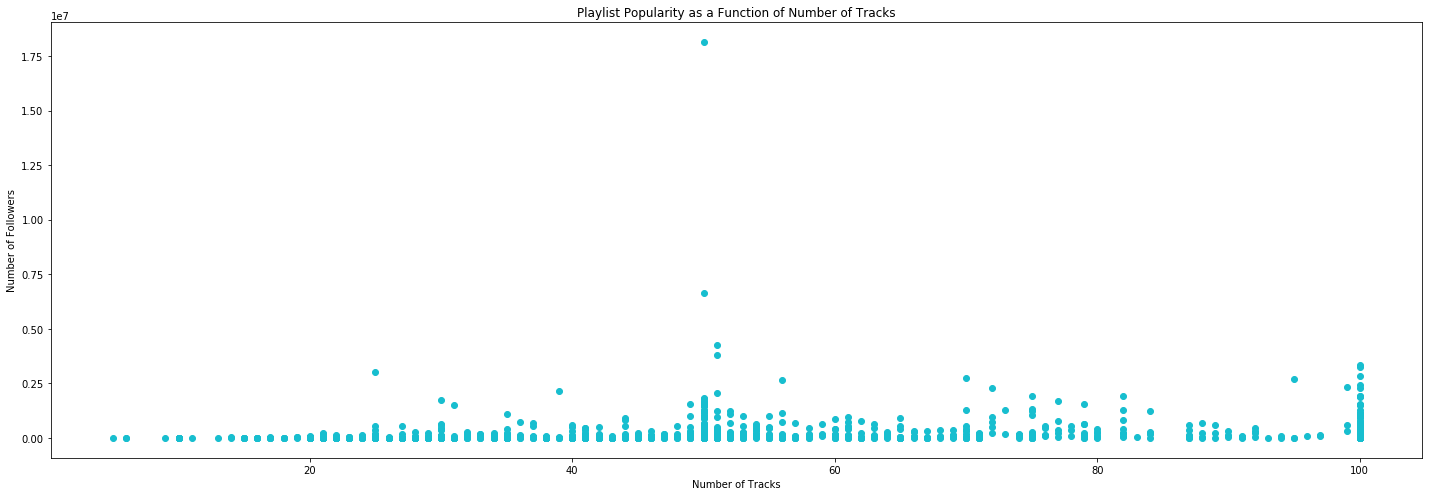

In [6]:
plt.figure(figsize = (20,7))
plt.scatter(data_train['num_tracks'], data_train['followers'], color = '#17becf')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Number of Tracks')

plt.tight_layout()
plt.savefig('num_tracks.png')

Here we see that there is quite a spread over the number of tracks per playlist. We see that a large number of playlists contain about 50, 100 or so songs, though there is no clear trend between number of tracks in a playlist and its popularity. Note the presence of an outlier, corresponding to a playlist of about 50 songs but an extremely large number of followers.

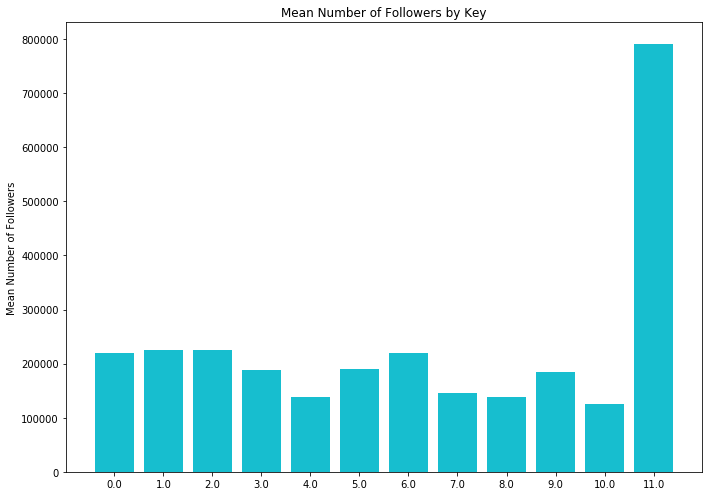

In [7]:
plt.figure(figsize = (10,7))
by_key = data_train.groupby('majority_key')
key_means = by_key['followers'].mean()
plt.bar(range(len(key_means)),key_means,tick_label=list(key_means.index), color='#17becf')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Key')

plt.tight_layout()
plt.savefig('key.png')

Here we compare the mean number of followers a playlist has, given the ‘key’ of the majority of its component songs. From the graph above, a value of 11.0 for the key of a song seems to have a significantly greater mean number of playlist followers.

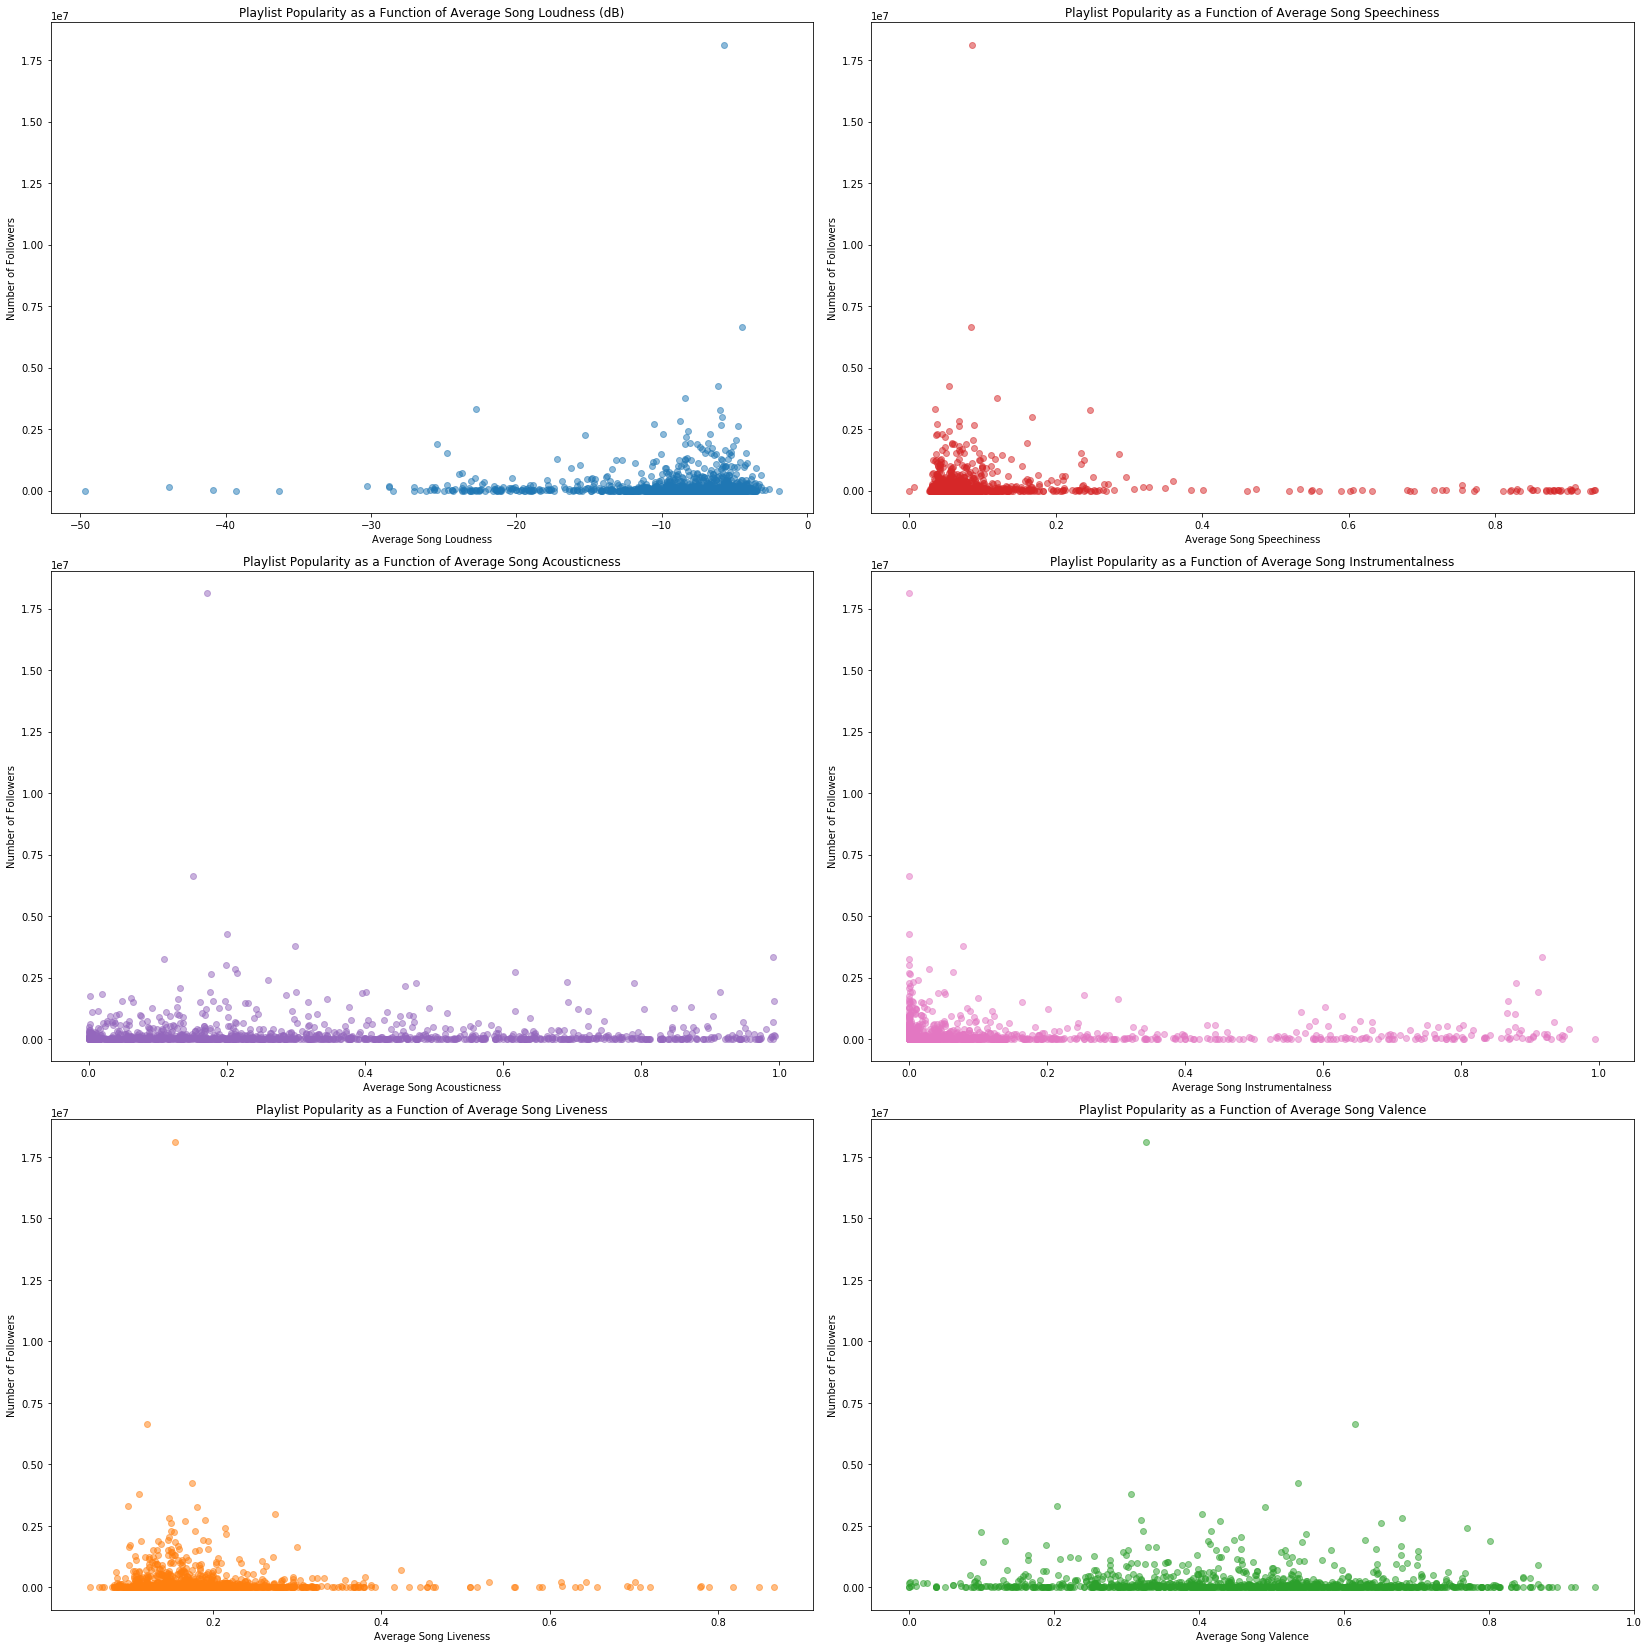

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(23, 23))

plt.subplot(3, 2, 1)
plt.scatter(data_train['avg_loudness'], data_train['followers'], color='#1f77b4', alpha=0.5)
plt.xlabel('Average Song Loudness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Loudness (dB)')

plt.subplot(3, 2, 2)
plt.scatter(data_train['avg_speechiness'], data_train['followers'], color='#d62728', alpha=0.5)
plt.xlabel('Average Song Speechiness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Speechiness')

plt.subplot(3, 2, 3)
plt.scatter(data_train['avg_acousticness'], data_train['followers'], color='#9467bd', alpha=0.5)
plt.xlabel('Average Song Acousticness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Acousticness')

plt.subplot(3, 2, 4)
plt.scatter(data_train['avg_instrumentalness'], data_train['followers'], color='#e377c2', alpha=0.5)
plt.xlabel('Average Song Instrumentalness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Instrumentalness')

plt.subplot(3, 2, 5)
plt.scatter(data_train['avg_liveness'], data_train['followers'], color='#ff7f0e', alpha=0.5)
plt.xlabel('Average Song Liveness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Liveness')

plt.subplot(3, 2, 6)
plt.scatter(data_train['avg_valence'], data_train['followers'], color='#2ca02c', alpha=0.5)
plt.xlabel('Average Song Valence')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Valence')

plt.tight_layout()
plt.savefig('audio_features.png')

Here we examined the audio features of the different component of a track in a playlist. We find out that some features are more significant than others. The plots show that the most playlists have greater average ‘loudness’ (dB) values that are closer to 0, whereas ‘speechiness’, ‘song instrumentalness’, and ‘liveness’ tend towards lower values. ‘acousticness’ and ‘valence’ have a much more even spread of values across the dataset. Second, there are no clear trends between any of these measures and the number of followers a playlist has. The graphs may hint the presence of louder songs, less speechy (or more vocal) songs, less instrumental (or more vocal), and less live (or likely studio-recorded) songs on a playlist contribute to an increased number of playlist followers.

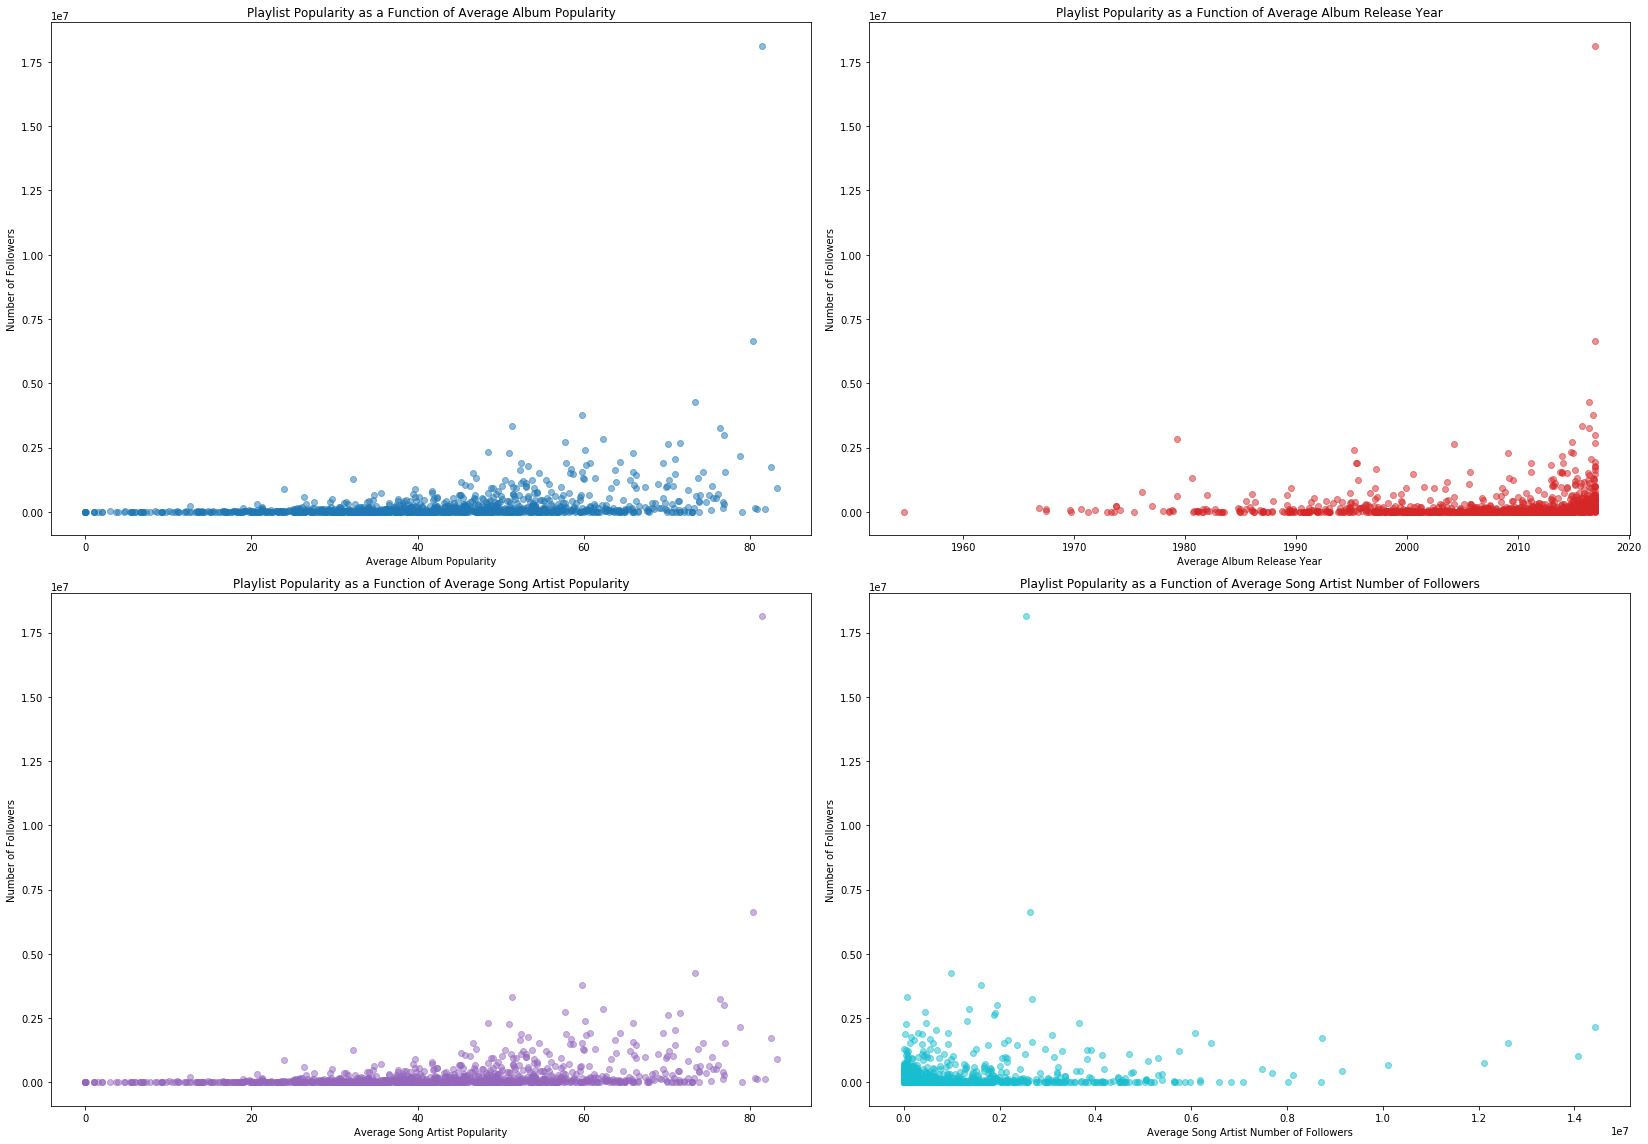

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(23, 16))

plt.subplot(2, 2, 1)
plt.scatter(data_train['avg_album_popularity'], data_train['followers'], color='#1f77b4', alpha=0.5)
plt.xlabel('Average Album Popularity')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Album Popularity')

plt.subplot(2, 2, 2)
plt.scatter(data_train['avg_album_release_year'], data_train['followers'], color='#d62728', alpha=0.5)
plt.xlabel('Average Album Release Year')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Album Release Year')

plt.subplot(2, 2, 3)
plt.scatter(data_train['avg_album_popularity'], data_train['followers'], color='#9467bd', alpha=0.5)
plt.xlabel('Average Song Artist Popularity')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Artist Popularity')

plt.subplot(2, 2, 4)
plt.scatter(data_train['avg_artist_followers'], data_train['followers'], color='#17becf', alpha=0.5)
plt.xlabel('Average Song Artist Number of Followers')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Artist Number of Followers')

plt.tight_layout()
plt.savefig('audio_info.png')

Again, by considering other features of the component of a track in a playlist, we can see that while there are no clear trends of these features with the number of followers with the playlists but the plots suggest that: First, album popularity artist popularity and album release year (more recent songs) tends to have large number of followers. Surprisingly tracks with songs where the artists have large followers tends to be less popular. This calls for further investigations. 

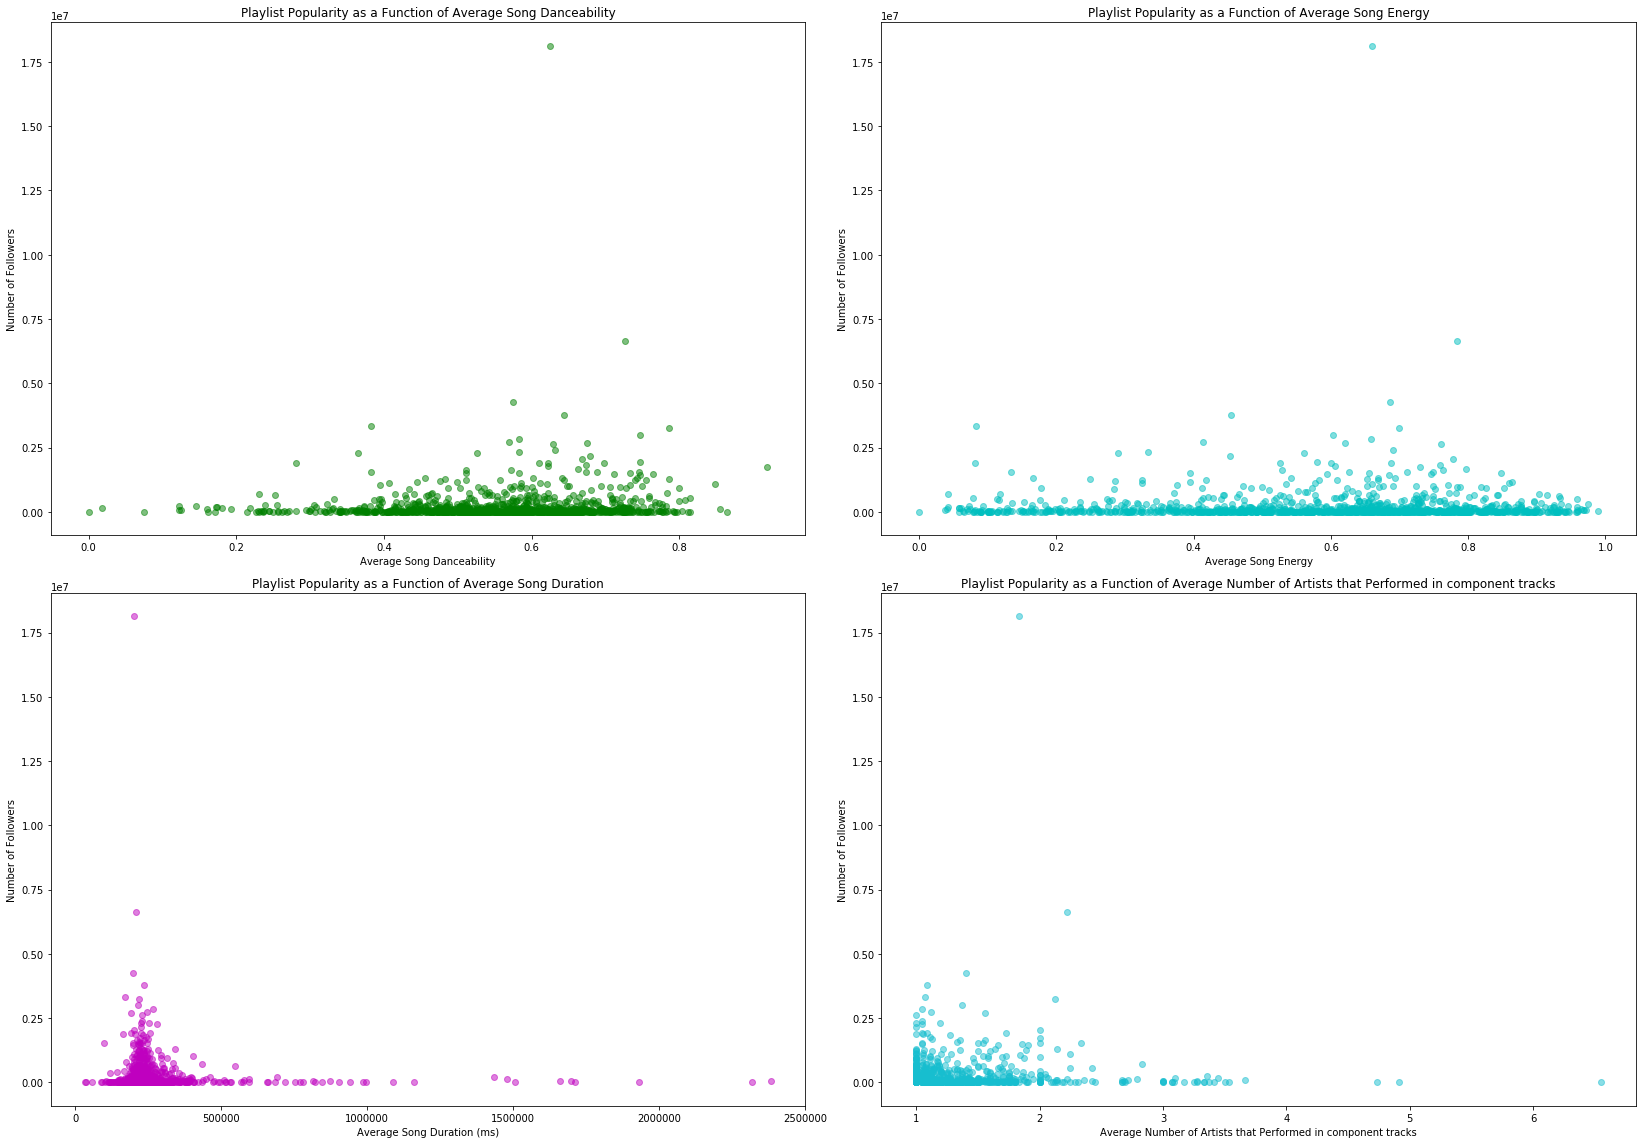

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(23, 16))

plt.subplot(2, 2, 1)
plt.scatter(data_train['avg_danceability'], data_train['followers'], color='g', alpha=0.5)
plt.xlabel('Average Song Danceability')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Danceability')

plt.subplot(2, 2, 2)
plt.scatter(data_train['avg_energy'], data_train['followers'], color='c', alpha=0.5)
plt.xlabel('Average Song Energy')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Energy')

plt.subplot(2, 2, 3)
plt.scatter(data_train['avg_duration_ms'], data_train['followers'], color='m', alpha=0.5)
plt.xlabel('Average Song Duration (ms)')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Duration')

plt.subplot(2, 2, 4)
plt.scatter(data_train['avg_num_artists'], data_train['followers'], color='#17becf', alpha=0.5)
plt.xlabel('Average Number of Artists that Performed in component tracks')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Number of Artists that Performed in component tracks')

plt.tight_layout()
plt.savefig('audio_features_additional.png')

Additional information regarding the tracks is displayed above. In particular, visualizations for ‘danceability’, ‘energy’ and ‘duration’ are displayed above. We don’t see particular clear trends here, though we do see pretty clearly that the spread of average song duration of the songs and the average number of artists that performed in a component track in a playlist are more closely clustered together, as most songs are just a few minutes long and just one or two atrtists. We see that a longer average song duration is likely correlated with fewer playlist followers. Also songs with fewer artists tends to be more popular.

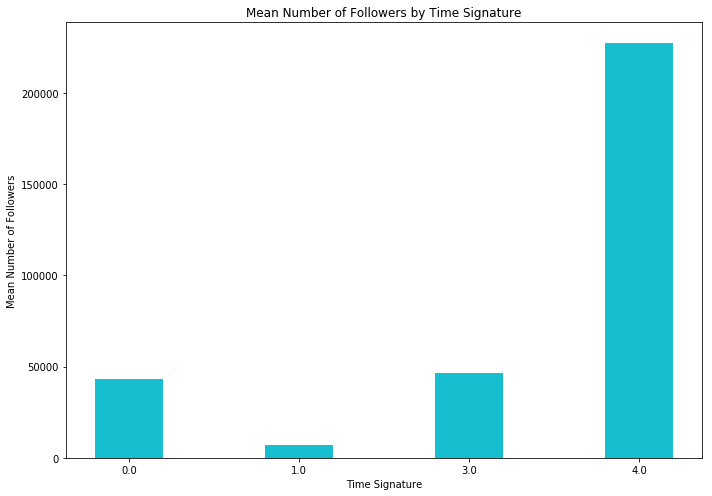

In [11]:
plt.figure(figsize = (10,7))
by_time_sig = data_train.groupby('majority_time_signature')
time_sig_means = by_time_sig['followers'].mean()
plt.bar(range(len(time_sig_means)),time_sig_means,tick_label=list(time_sig_means.index), color='#17becf', width =0.4)
plt.ylabel('Mean Number of Followers')
plt.xlabel('Time Signature')
plt.title('Mean Number of Followers by Time Signature')

plt.tight_layout()
plt.savefig('time_signature.png')

Here we compare the mean number of followers a playlist has, given the ‘time_signature’ of the majority of its component songs. From the graph above, a value of 4.0 for time signature (4 beats/measure, the most common time signature) seems to have the strongest positive relationship with mean number of playlist followers.

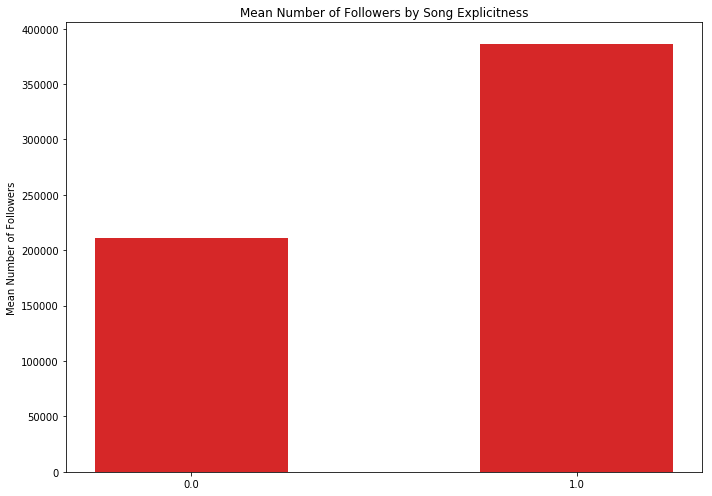

In [12]:
plt.figure(figsize = (10, 7))
by_explicit = data_train.groupby('majority_explicit')
explicit_means = by_explicit['followers'].mean()
plt.bar(range(len(explicit_means)),explicit_means,tick_label=list(explicit_means.index), color='#d62728', width = 0.5)
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Song Explicitness')

plt.tight_layout()
plt.savefig('explicit.png')

Here we compare the mean number of followers a playlist has, given the ‘majority_explicit’ the majority of explicitness of the component songs. From the plot, it can be seen that songs that are majorly explicit are more popular than those that are less explicit. Maybe songs that are more explicit are likely more recent but this needs further investigation.

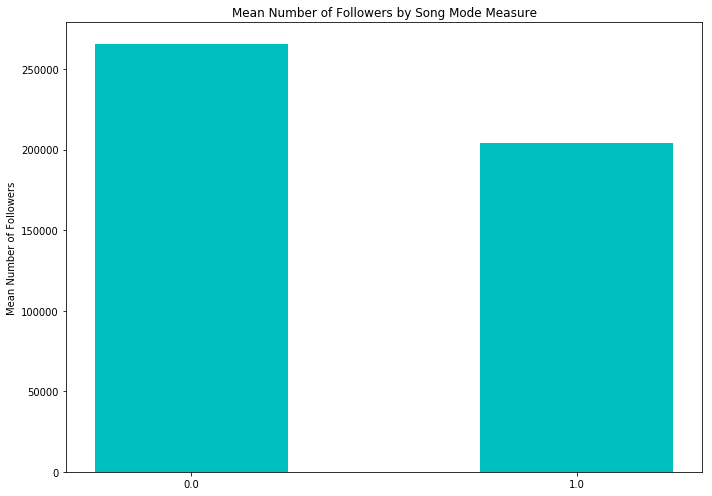

In [13]:
plt.figure(figsize = (10, 7))
by_mode = data_train.groupby('majority_mode')
mode_means = by_mode['followers'].mean()
plt.bar(range(len(mode_means)),mode_means,tick_label=list(mode_means.index), color='c', width = 0.5)
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Song Mode Measure')

plt.tight_layout()
plt.savefig('mode.png')

Here we compare the mean number of followers a playlist has, given the ‘majority_mode’ of the component songs, where the value of the mode indicate the majority of the component tracks in the playlist. The plot shows that the songs in a minor key (mode = 0.0) on average generate a larger following that songs in a major key (mode = 0.1). 

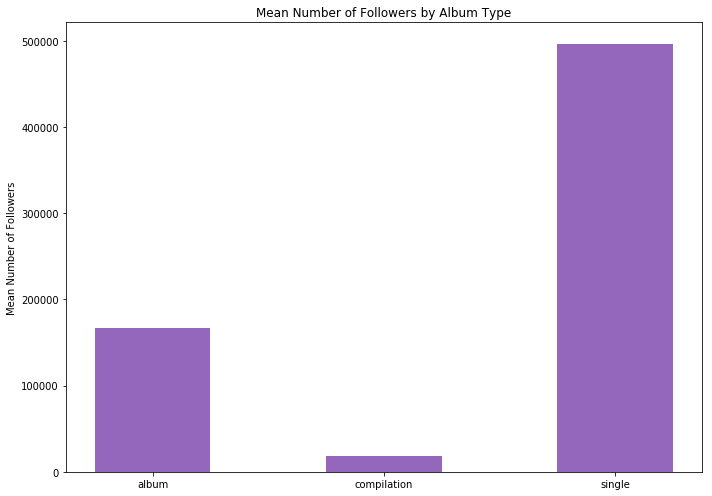

In [14]:
plt.figure(figsize = (10, 7))
by_album_type = data_train.groupby('majority_album_type')
album_type_means = by_album_type['followers'].mean()
plt.bar(range(len(album_type_means)),album_type_means,tick_label=list(album_type_means.index), color='#9467bd', width = 0.5)
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Album Type')

plt.tight_layout()
plt.savefig('album_type.png')

The plot shows that songs released as singles are more popular than those released as album and compilation. This seems promising, since songs that are released as singles usually generate a large buzz, as fans’ and listeners’ attentions are largely more focused on the release of a particular new single.

## Building our prediction model

In [15]:
# one-hot encoding for categorical predictors
# When extracting features, from a dataset, it is often useful to transform categorical features into vectors 
#so that you can do vector operations on them.

data_train = pd.get_dummies(data_train, columns=['majority_key','majority_time_signature','majority_album_type'], 
                            drop_first=False)
data_test = pd.get_dummies(data_test, columns=['majority_key','majority_time_signature','majority_album_type'], 
                           drop_first=False)

# get column names
column_headers = list(data_train.columns.values)

# get variables
X_train = data_train.iloc[:,5:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,5:]
y_test = data_test.iloc[:,0]

In [16]:
data_train.columns.values

array(['followers', 'majority_artist_genres', 'name', 'owner', 'track_ids',
       'num_tracks', 'avg_song_popularity', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence',
       'avg_duration_ms', 'avg_num_artists', 'avg_num_markets',
       'majority_explicit', 'majority_mode', 'avg_album_popularity',
       'avg_album_release_year', 'avg_artist_popularity',
       'avg_artist_followers', 'majority_key_0.0', 'majority_key_1.0',
       'majority_key_2.0', 'majority_key_3.0', 'majority_key_4.0',
       'majority_key_5.0', 'majority_key_6.0', 'majority_key_7.0',
       'majority_key_8.0', 'majority_key_9.0', 'majority_key_10.0',
       'majority_key_11.0', 'majority_time_signature_0.0',
       'majority_time_signature_1.0', 'majority_time_signature_3.0',
       'majority_time_signature_4.0', 'majority_album_type_album',
       'majority_album_type_compilation', 'majority_album_type_

## Baseline model

## Simple Linear Regression Model

In [17]:
X_train2 = sm.add_constant(X_train.values)
model = sm.OLS(y_train.values, X_train2)
results = model.fit()

y_hat_train = results.predict(X_train2)

# test case
X_test2 = sm.add_constant(X_test.values)
y_hat_test = results.predict(X_test2)

r2_score_train = r2_score(y_train, y_hat_train) 
r2_score_test = r2_score(y_test, y_hat_test)

print('R^2 Values for Train, Test Using Linear Regression:', r2_score_train, r2_score_test)

R^2 Values for Train, Test Using Linear Regression: 0.188062242633 0.127995346805


The baseline model used was a simple linear regression which produced a R^2 value of .128 for the model. Thus, this is the R^2 value that we are trying to beat with our selected models.

The next strategy is to select couple of other models like the regression with polynomial terms, kNN regression, and random forest regression with multiple depths.We will then fine tune our two best models.

## Polynomial Term Regression

In [18]:
r2_train_poly = []
r2_test_poly = []

# make dataframes to add polynomial terms to
cont = ['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_num_artists', 'avg_num_markets']
X_binary_only = X_train.drop(['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_num_artists', 'avg_num_markets'], axis=1)
X_test_bin_only = X_test.drop(['avg_album_popularity', 'avg_album_release_year', 'avg_artist_popularity', 'avg_artist_followers', 'num_tracks', 'avg_song_popularity', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_num_artists', 'avg_num_markets'], axis=1)
X_poly = X_binary_only.copy()
X_test_poly = X_test_bin_only.copy()

X_poly_test_all = X_test.copy()
X_poly_train_all = X_train.copy()

# function to create and add polynomial terms to dataframe
def add_poly_features(train, test, poly_train, poly_test, polylist):
    for col in polylist:
        for i in range(2,4):
            poly_train[col + '_' + str(i)] = train[col]**i
            poly_test[col + '_' + str(i)] = test[col]**i

add_poly_features(X_train, X_test, X_poly_train_all, X_poly_test_all,cont)

# polynomial term regression 
poly_regression_model = linear_model.LinearRegression(fit_intercept=False)
poly_regression_model.fit(X_poly_train_all, y_train)

y_hat_train = poly_regression_model.predict(X_poly_train_all)
y_hat_test = poly_regression_model.predict(X_poly_test_all)


r2_train_poly.append( r2_score(y_train, y_hat_train))
r2_test_poly.append( r2_score(y_test, y_hat_test))

print('R^2 Values for Train, Test Using Polynomial Regression:', r2_train_poly, r2_test_poly)

R^2 Values for Train, Test Using Polynomial Regression: [0.22194681358443402] [0.19338839909150896]


## K-Nearest Neighbour Regression

In [19]:
# try multiple k's
K = [1, 2, 4, 8, 10, 50, 100, 250, 500, 600, 700, 800, 900, 1000]
r2_test_knn = []
r2_train_knn = []

# try each different k and calculate R^2
for i,k in enumerate(K): 
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predicted_pickups_train = knn_model.predict(X_train)
    predicted_pickups = knn_model.predict(X_test)

    r2_train_knn.append( r2_score(y_train, predicted_pickups_train))
    r2_test_knn.append( r2_score(y_test, predicted_pickups))
    
print('R^2 Values for Train Using kNN Regression:', r2_train_knn)
print()
print('R^2 Values for Test Using kNN Regression:', r2_test_knn)

R^2 Values for Train Using kNN Regression: [0.99999999826605368, 0.70705295578349214, 0.26384447277586165, 0.14062785261746957, 0.16815399746437676, 0.041790871252071704, 0.026784122297934254, 0.022334620712726183, 0.013199508562418361, 0.011615787116215581, 0.0092690893153853926, 0.0079270698554815278, 0.0074171109814979985, 0.0056618388771036976]

R^2 Values for Test Using kNN Regression: [-0.87195646189656983, -0.32627859453665375, -0.1542926908927027, -0.089021508792754611, -0.11809935938908334, -0.020776306046869086, -0.010578038605963069, 0.0031685923025387419, 0.0036867169843481928, 0.0026448150105176094, 0.0015801451321187931, 0.0015217888123526535, 0.00056359830487651141, -0.0006410793680169391]


## Random Forest

In [20]:
r2_train_rf = []
r2_test_rf = []

# check multiple depths to see which depth is best
for i in range(1, 20):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)

    rf_yhat_train = rf_reg.predict(X_train)
    rf_yhat_test = rf_reg.predict(X_test)

    r2_train_rf.append( r2_score(y_train, rf_yhat_train))
    r2_test_rf.append( r2_score(y_test, rf_yhat_test))

print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf)

R^2 Values for Train Using Random Forest Regression: [0.49720296756434346, 0.61053350899380598, 0.68024242103697308, 0.67417419454609795, 0.72703450561074345, 0.76129438982654363, 0.82826168965869496, 0.89075878029084954, 0.82731366848664911, 0.90645817073650103, 0.82926781510319325, 0.79301657823217642, 0.78252458746760933, 0.79662562095222622, 0.84607245407198439, 0.86602676866652106, 0.92853095764601801, 0.83285277634645305, 0.9345492041547051]

R^2 Values for Test Using Random Forest Regression: [0.065688530132135381, 0.11955126119857296, 0.23689289946392322, 0.26770594423792349, 0.26822437144144051, 0.30804616302553378, 0.29194690047452032, 0.30943028691050356, 0.36153466389056399, 0.30359581277335412, 0.22811542159418852, 0.24413334080333959, 0.17365091726726267, 0.2942474156517787, 0.23550012470930493, 0.25922089750101251, 0.24252559131939444, 0.26024406499389796, 0.25732779460683675]


In [21]:
# get best depth
index, value = max(enumerate(r2_test_rf), key=operator.itemgetter(1))
best_depth2 = index + 1

print('Best Depth for Random Forest Tree Depth:', best_depth2 )

Best Depth for Random Forest Tree Depth: 9


## Ridge and Lasso on Polynomial Term Regression

In [22]:
# Ridge Regression on Polynomial Term Regression
lambdas = [.001,.005,1,5,10,50,100,500,1000]    
ridge = RidgeCV(alphas=lambdas, fit_intercept=False, normalize=True, cv=10)
ridge.fit(X_poly_train_all, y_train)

print("Ridge train R^2: ", ridge.score(X_poly_train_all, y_train))
print('Ridge test R^2', ridge.score(X_poly_test_all, y_test))

Ridge train R^2:  0.313537304127
Ridge test R^2 0.263398658611


In [23]:
# Lasso Regression on Polynomial Term Regression
lasso = LassoCV(alphas=lambdas, fit_intercept=False, normalize=True, cv=10)
lasso.fit(X_poly_train_all, y_train)

print("Lasso train R^2: ", lasso.score(X_poly_train_all, y_train))
print('Lasso test R^2', lasso.score(X_poly_test_all, y_test))

Lasso train R^2:  0.330594608129
Lasso test R^2 0.221099911808


In [24]:
# Fine Tuning Random Forest: get R^2 values for optimal depth that we calculated in the above approach
r2_train_rf = []
r2_test_rf = []

rf_reg = RandomForestRegressor(max_depth=best_depth2)
rf_reg.fit(X_train, y_train)

rf_yhat_train = rf_reg.predict(X_train)
rf_yhat_test = rf_reg.predict(X_test)

r2_train_rf.append( r2_score(y_train, rf_yhat_train))
r2_test_rf.append(r2_score(y_test, rf_yhat_test))

print('R^2 Values for Train, Test Using Random Forest Regression:', r2_train_rf, r2_test_rf)

R^2 Values for Train, Test Using Random Forest Regression: [0.90262541883850489] [0.24087108131907387]


In [25]:
# step 1: fine tuning number of trees
r2_train_rf_trees = []
r2_test_rf_trees = []

# will try various number of trees
trees = [2**x for x in range(8)]  # 2, 4, 8, 16, 32, ... 

# try different trees with optimal depth
for n_trees in trees:
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=best_depth2, max_features='auto')
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    rf_yhat_test = rf.predict(X_test)

    r2_train_rf_trees.append(r2_score(y_train, rf_yhat_train))
    r2_test_rf_trees.append(r2_score(y_test, rf_yhat_test))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_trees)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf_trees)

R^2 Values for Train Using Random Forest Regression: [0.57492208179960747, 0.79613269275111742, 0.74639675519356485, 0.70857324665172727, 0.90271868614388662, 0.85278439937628614, 0.88376628817650682, 0.85892059438543478]

R^2 Values for Test Using Random Forest Regression: [-0.019096793332201933, 0.063317838578937025, 0.1650974481859171, 0.28993793816624602, 0.25554733422998355, 0.30215898703465505, 0.26622004029166813, 0.2695700261496573]


In [26]:
# get best number of trees
index, value = max(enumerate(r2_test_rf_trees), key=operator.itemgetter(1))
best_trees2 = trees[index]

print('Random Forest Best Number of Trees:',best_trees2)
print('R^2 Value:',value)

Random Forest Best Number of Trees: 32
R^2 Value: 0.302158987035


In [27]:
# step 2: fine tuning number of predictors used
r2_train_rf_feat = []
r2_test_rf_feat = []

# 38 = len(list(X_train)) is the maximum number of predictors we have
for i in range(1, len(list(X_train))):
    rf = RandomForestRegressor(n_estimators=best_trees2, max_depth=best_depth2, max_features=i)
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    rf_yhat_test = rf.predict(X_test)

    r2_train_rf_feat.append(r2_score(y_train, rf_yhat_train))
    r2_test_rf_feat.append(r2_score(y_test, rf_yhat_test))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_feat)
print()
print('R^2 Values for Test Using Random Forest Regression:', r2_test_rf_feat)

R^2 Values for Train Using Random Forest Regression: [0.75633988113401796, 0.70946280665336514, 0.74961922274263015, 0.79715576473639183, 0.85743741826413333, 0.83103940853478919, 0.88522452216497172, 0.85777386983596993, 0.88534598066540782, 0.84321293307864076, 0.88287446763216326, 0.87535793526961547, 0.81132008668654254, 0.84070341093556755, 0.90326674743422597, 0.87555445691910205, 0.85607681263792534, 0.84174249333054441, 0.86104110520470523, 0.84989793225520183, 0.86331742273837153, 0.86374805813696498, 0.91830319188432075, 0.87902292764811663, 0.81898358578364983, 0.81512189037245752, 0.88782640132252211, 0.85056039360514102, 0.85254321536783029, 0.85774173971159018, 0.78129295743555305, 0.8484575148908714, 0.8238652173578408, 0.89008544896313146, 0.90070565416255888, 0.87816773093967326, 0.8643900597449834]

R^2 Values for Test Using Random Forest Regression: [0.13685407984731046, 0.13056892014350696, 0.20169352611776525, 0.17519220035219507, 0.17637356446846342, 0.19977953355

In [28]:
# get best number of predictors and best R^2 value
index, value = max(enumerate(r2_test_rf_feat), key=operator.itemgetter(1))

print('RandomForest Number of Predictors for Best Value:',index+1)
print('Final Best R^2 Value:',value)

RandomForest Number of Predictors for Best Value: 26
Final Best R^2 Value: 0.299518312815


# Results and Conclusions

It can be seen that the two best models are the polynomial term regression and random forest which have $R^2$ values that beat our baseline model, so we decided to fine tuned these two models to see if we can further improve them.To do so, both ridge and lasso regressions were performed on the polynomial term regression which produced values of 0.263 and 0.221 respectively. Both of these values beat the baseline of 0.128. We then fine tuned the random forest model using the same strategy (optimizing depth, number of trees, number of predictors). The best depth seemed to be 9 and produced a value of 0.240. The best number of trees seemed to be 32 and produced a $R^2$ of 0.302 which was an improvement. The best number of predictors seemed to be 26 which produced a final R^2 value of .2995 which was essentially the same as the one before. Thus, our best model was the optimized random forest that produced a $R^2$ value of ~ 0.3.



## Future work

These results could potentially be used for generating a recommendation system. A user could input some preferences regarding some of the more intuitive predictors we use such as genre, loudness, valence, or acousticness and these could be used to recommend certain songs to add to a playlist that would increase its popularity. This recommendation system could have a user-specified part where all the songs that we would put in would match the few features a user specifies but then our algorithm could predict songs that would have the highest probability of being popular by selecting tracks with high values for artist popularity, album popularity, album release year, and any other subset of our predictors that we used.